In [11]:
%matplotlib notebook

# Line labels

The first input for $LiMe$ measurements is a label for the line being measured. This label follows a notation based on the [PyNeb](http://research.iac.es/proyecto/PyNeb/) the emission analysis package by [V. Luridiana, C. Morisset and R. A. Shaw (2015)](https://www.aanda.org/articles/aa/abs/2015/01/aa23152-13/aa23152-13.html).

The first element is the particle responsible for the transition while the second element is the wavelength of the transition. This wavelength must include the units.

Additional suffixes provide additional information for the fitting or information regarding the transitions.

In [3]:
# Import libraries for the example
from IPython.display import Image, display
import lime

## Core components 

These elements of the label are compulsary and their order is fixed.

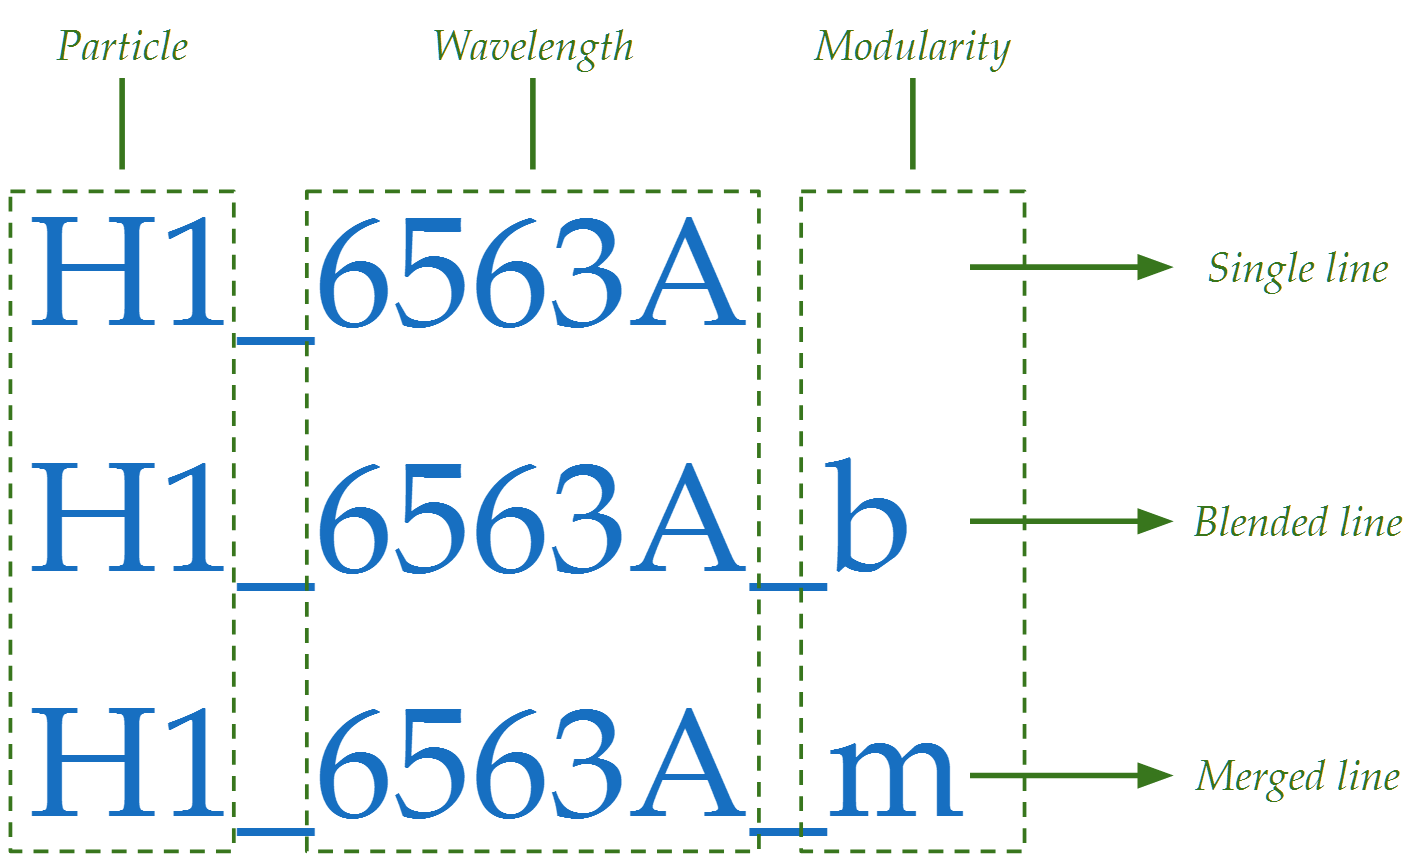

In [7]:
display(Image(filename='../images/label_core_components.png', width = 800))

### Particle component

The first of the line label is the particle responsible for the transition:

* Ionized ions: These particles are specified using the corresponding element [chemical symbol](https://en.wikipedia.org/wiki/Chemical_symbol) followed by the stage of ionization in stage of ionization using arabic numerals.

<div class="alert alert-info">

**Please remember:** The guidelines above are the recomended format for the particle component in $LiMe$ label notation. You can still type whatever particle name you want and it should not be an issue for your fittings (although you may miss some features). 

</div>

### Wavelength component

The second element of the line label is the transition wavelength. This element is arguable the most important for the fitting. This transition must be on the rest frame. It provides the following information during the fitting:

* Theoretical wavelength value for $LiMe$ line detection functions.
* Initial value for the Gaussian center for the line location.
* Transition wavelength units.

Regarding the latter item, the units that $LiMe$ can recogniced currently are:

In [5]:
from lime.tools import UNITS_LATEX_DICT

print(f'(LiMe - LaTex)')
for key, value in UNITS_LATEX_DICT.items():
    print(f'{key} =\t {value}')

(LiMe - LaTex)
A =	 \AA
um =	 \mu\!m
nm =	 nm
Hz =	 Hz
cm =	 cm
mm =	 mm
Flam =	 erg\,cm^{-2}s^{-1}\AA^{-1}
Fnu =	 erg\,cm^{-2}s^{-1}\Hz^{-1}
Jy =	 Jy
mJy =	 mJy
nJy =	 nJy


### Modularity component

The final core component informs $LiMe$ if the line profile fitting consists in one or multiple Gaussian curves. This item must be at the end of the line label string. The following images provide and example of each with the observation of the $[SII]6716,6731Å$ doublet:

#### Single line

In $LiMe$ a single line referst to an emission or absorption feature, with can be modelled with a single transition and fit with a single Gaussian curve:

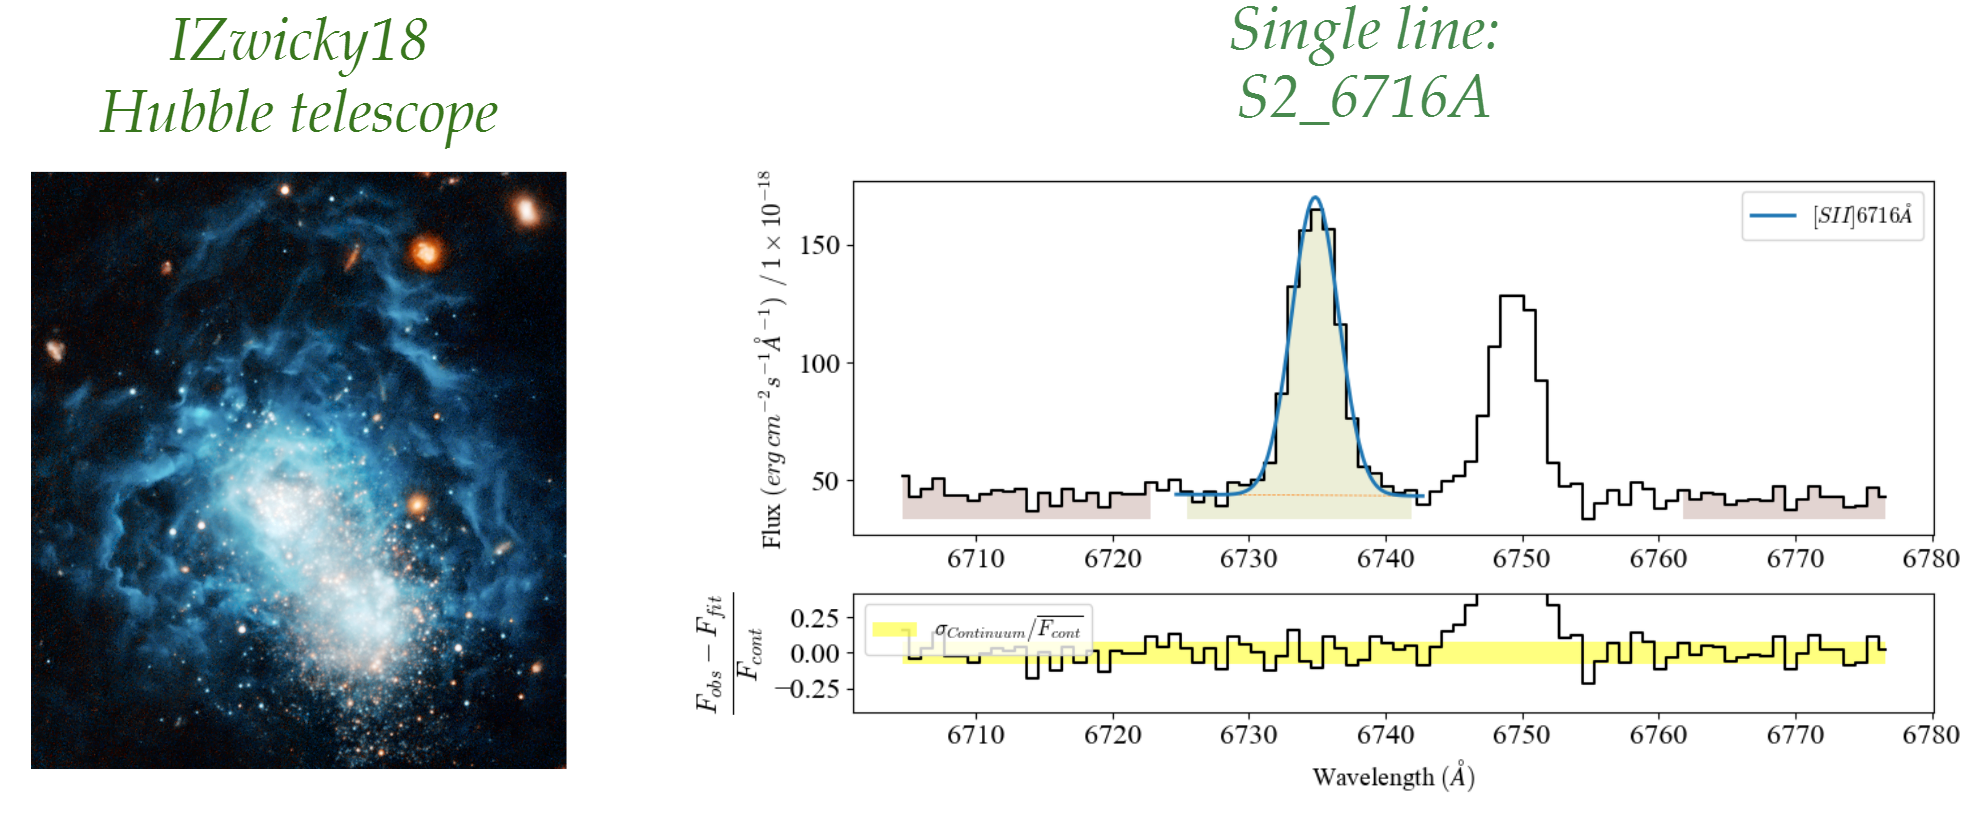

In [6]:
display(Image(filename='../images/SingleLine_diagram.png', width = 800))

This is the default line format.

#### Blended line

A blended line is composed of multiple transtions and/or kinematic components. If the user adds the the *"_b"* suffix **and** includes the components in the fitting configuration (joined by "+"). $LiMe$ will proceed to fit one Gaussian profile per component.

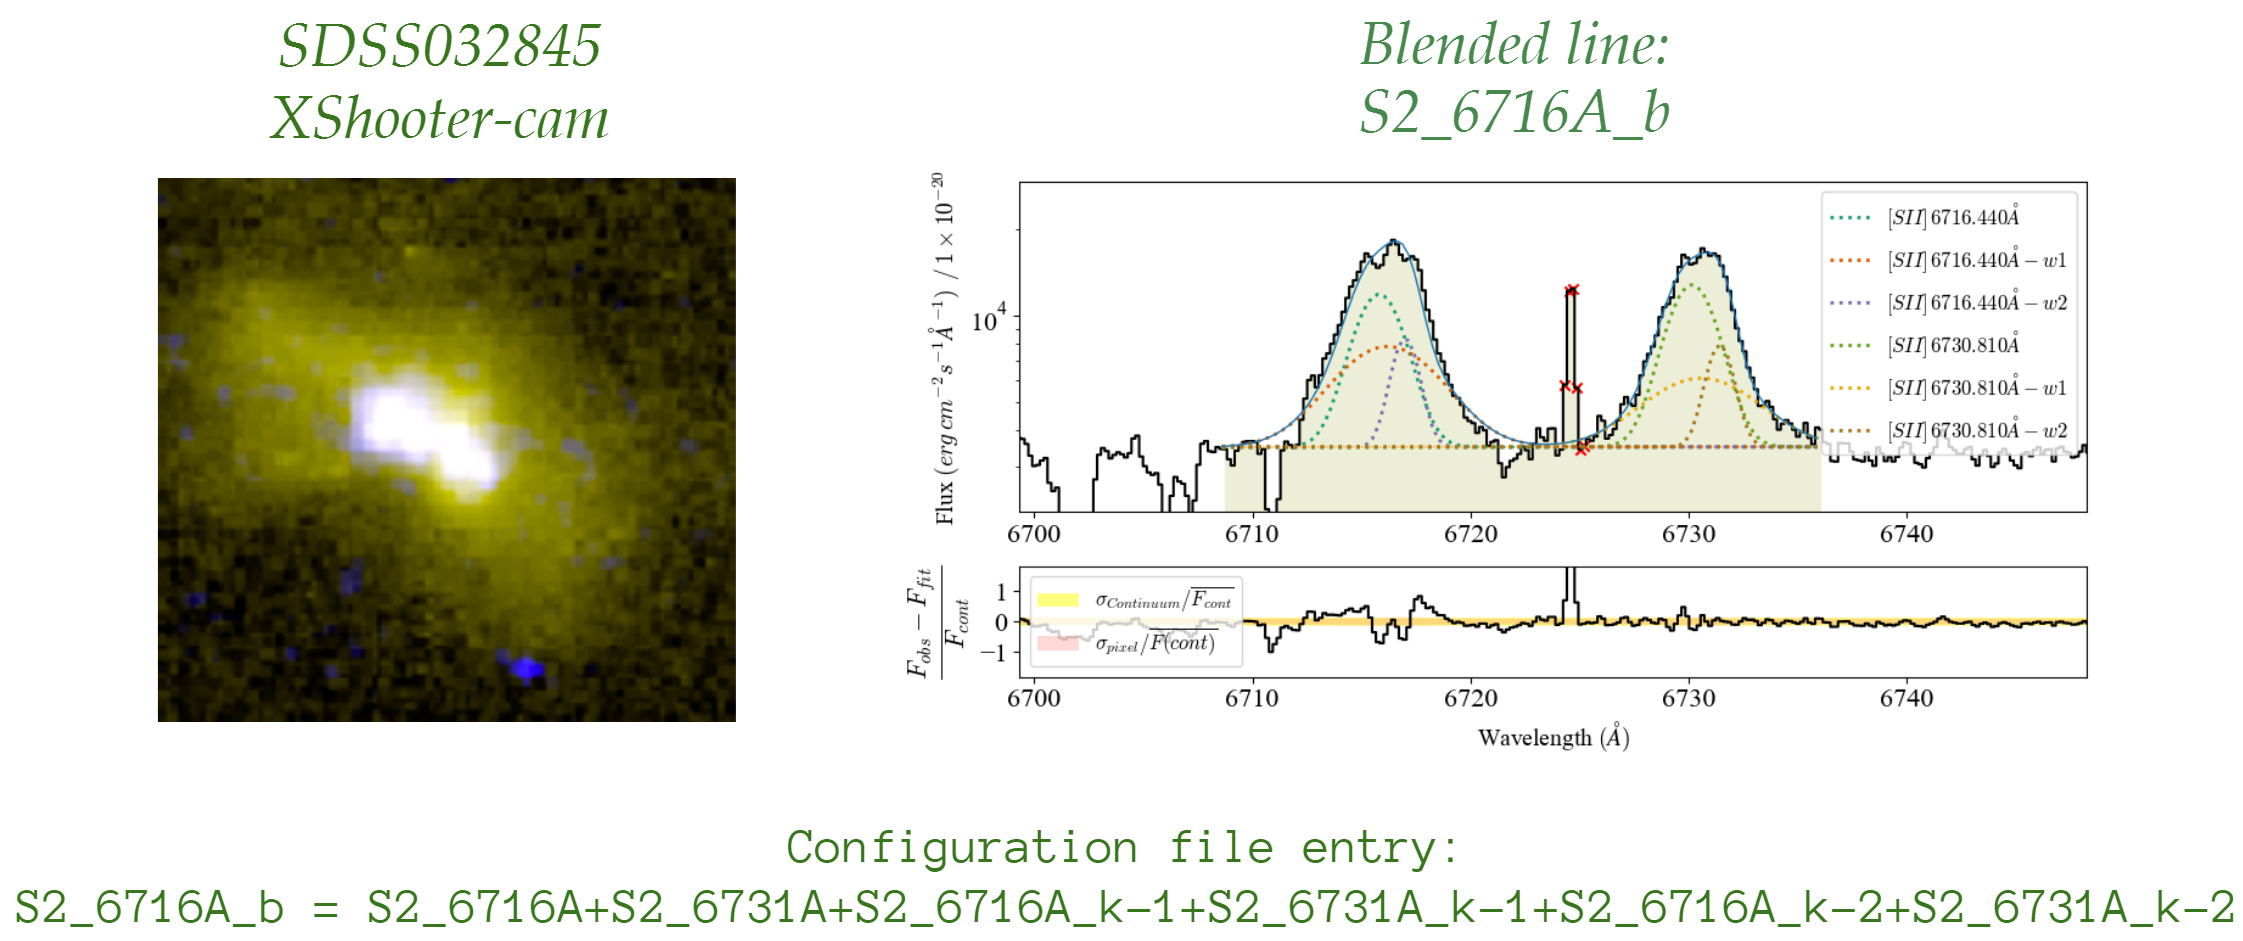

In [8]:
display(Image(filename='../images/BlendedLine_diagram.png', width = 800))

In the example, we fit both $[SII]6716,6731Å$ transitions, where each line has 2 additional kinematic components. These kinematic components must include the kinematic suffix  (_k-1, _k-2, ...).   

#### Merged line

A merged line assumes that there are multiple transition contributing to the observed line. The user adds the *"_m"* suffix **and** includes the components in the fitting configuration (joined by "+"). However, $LiMe$ will only fit one line:

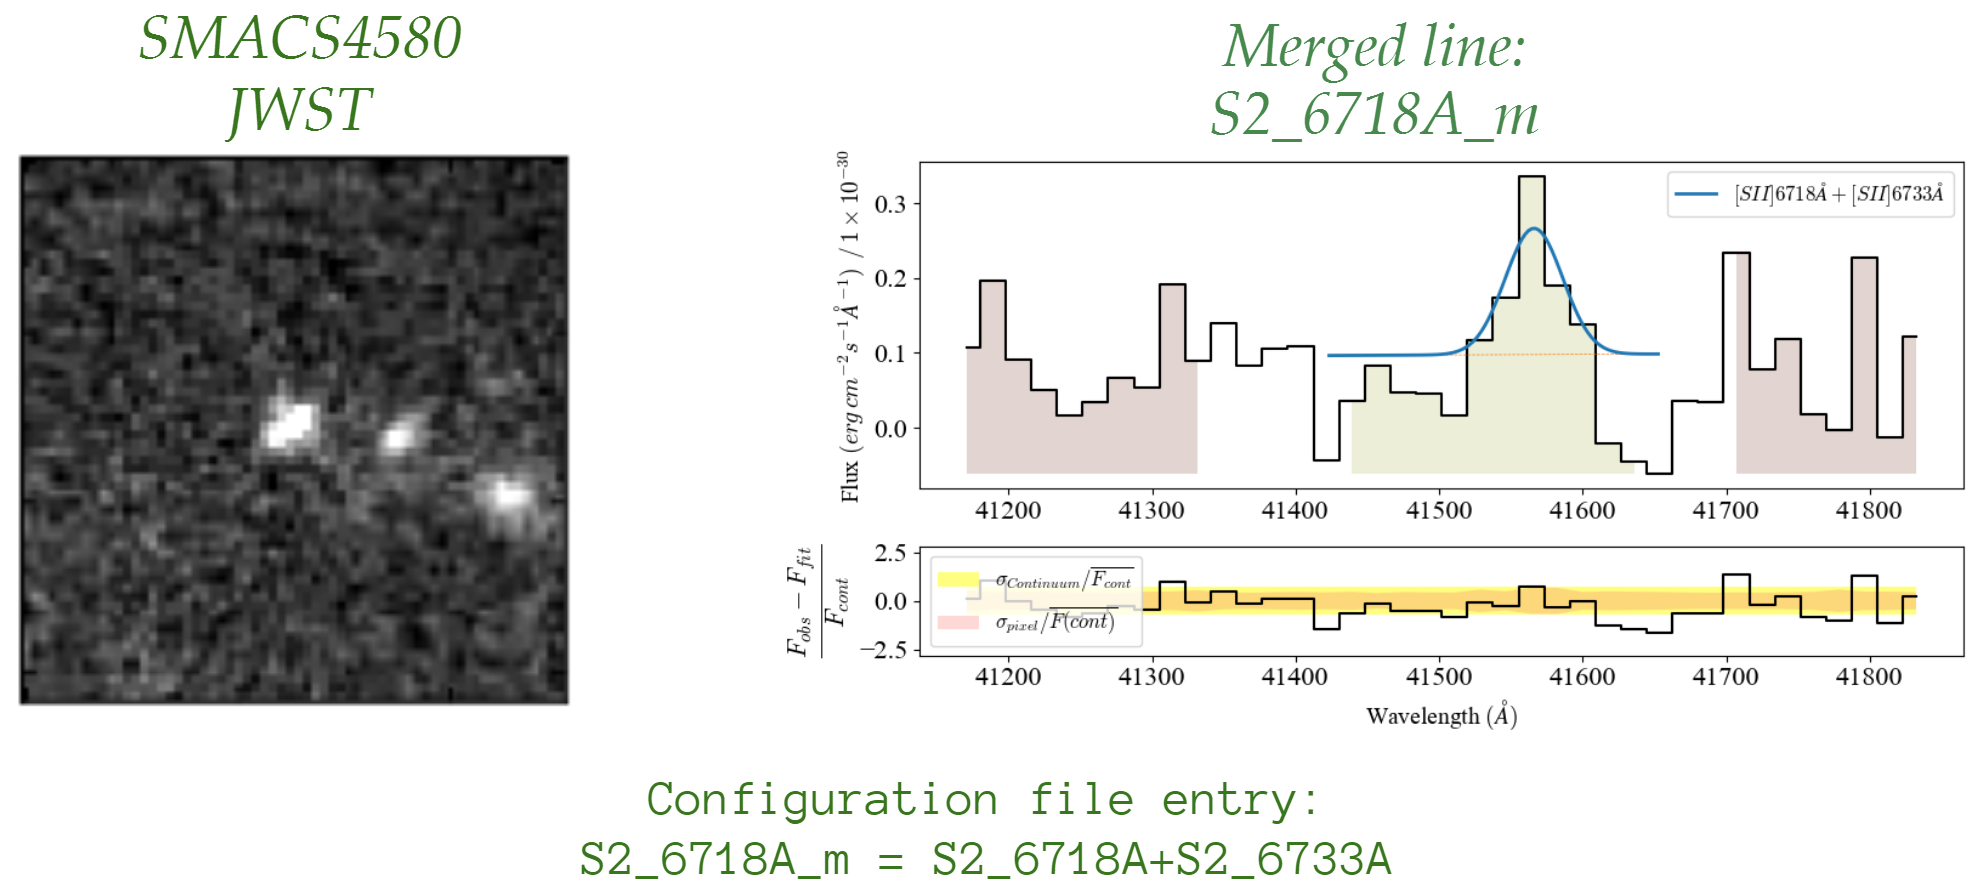

In [9]:
display(Image(filename='../images/MergedLine_diagram.png', width = 800))

This classification is usefull in those cases where the user wants to keep track of the transitions contributting to a line flux but the observational resolution is not good enought to isolate individual components. In the case above, we can see that the noise has devoured the $[SII]6716Å$ so we can only fitted the redder component. In the output log, this line will be saved as "S2_6718A_m" with the ``profile_label=S2_6718A+S2_6733A
`` (since this observation was done in vacuum, the wavelength is slightly higher)

## Optional components 

Unlike in the previous case, the optional components have default values. This means that the user **can exclude them** from the label and they have a **free order**:

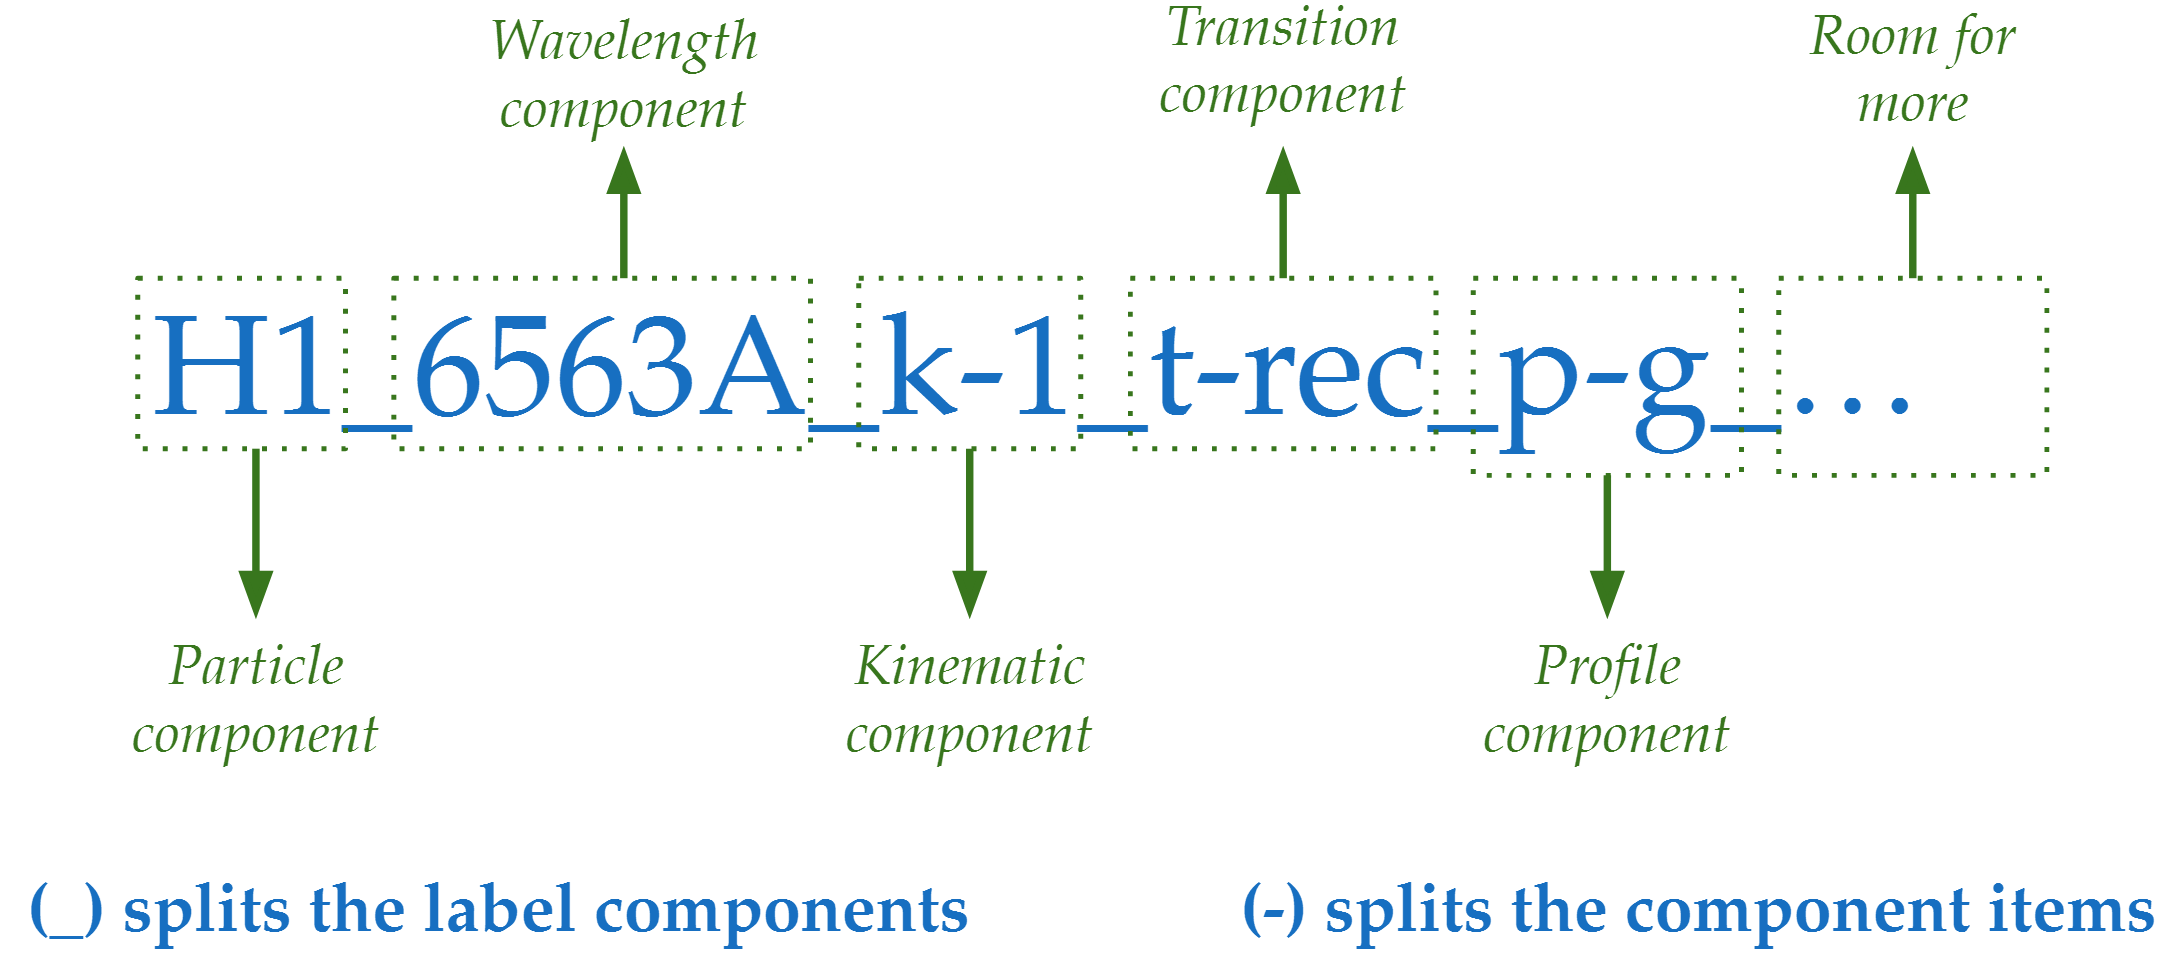

In [10]:
display(Image(filename='../images/label_all_components.png', width = 800))

If the user includes any of these components they **must start** with the key letter followed by a dash **"-"**.

### Kinematic component (k)

The default value for the component is 0 ("_k-0" suffix). It is recomended to use higher values for a wider component making "_k-0" the narrower.

<div class="alert alert-info">

**Please remember:** If you want to compare the same kinematic component between diferent lines or spectra, it is essential to add more constrains in the fitting configuration to make sure that the output profiles maintain a uniform labeling. 

</div>

### Profile component (p)

This component specifies the profile for the fitting. The default value is "p-g" for a Gaussian profile.

<div class="alert alert-info">

**Please remember:** At the present time $LiMe$ can only fit a Gaussian profile. 

</div>

### Transition component (t)

This component provides information regarding the line transition in order to construct its classical notation using latex. The options currently available are:

* rec: Recombination line
* col: Collisional excited line
* sem: Semi-forbidden transition line
* mol: Mollecular line
* abs: Absoption